# LUT的作用与用法

把一个颜色匹配到另一个颜色，把一个低对比度的图蒲培到一个高对比度的图。

假设下面这张图，图的像素值有40、30，通过查找表，像素的值就变成了90和10，从而提高了图像对比度。

![查找表](res/lut-01.png)

那么，查找表中做了什么什么事情？查找表可以是一个单调增函数或单调减函数。

> 如果通过查找表对图像的每个像素点进行处理，显然运算量会很大。图像的像素点的每个通道取值在0~255之间，所以依照这个特性，可以只计算只计算256个，然后建立索引。

## 自定义LUT

下面通过LUT将一张彩色的图像变成一张灰度图像，再将其变成一张二值图像，也就是将LUT中index小于127的等于0，大于等于127的就等于255。

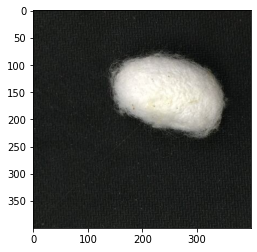

In [1]:
import cv2 as cv
import numpy as np
import utils as plt

def customColorMap(mat):
    a = []
    for i in range(256):
        if i < 127:
            a.append(255)
        else:
            a.append(0)

    h, w, ch = mat.shape
    for r in range(h):
        for c in range(w):
            b, g, r = mat[r, c]
            b = a[b]
            g = a[g]
            r = a[r]
            mat[r, c] = [b, g, r]
    return mat

src = cv.imread('images/canjian.jpg')
plt.imshow(src)

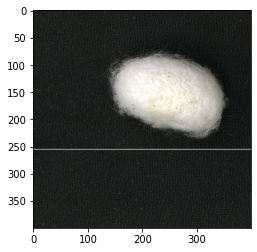

In [2]:
src_lut = customColorMap(src)
plt.imshow(src_lut)

## `applyColorMap(src, colormap[, dst]) -> dst`
在opencv中提供了一些内置的LUT，通过`applyColorMap`进行应用。


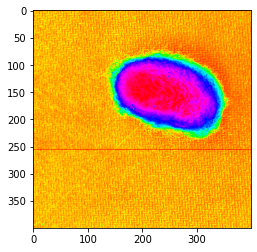

In [3]:
src_result = cv.applyColorMap(src, cv.COLORMAP_HSV)
plt.imshow(src_result)

